In [29]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [30]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [31]:

df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240910_140319.braidz")
df,csvs["opto"]
data1 = extract_stimulus_centered_data(df, csvs["opto"])
list(data1)
AngV1 = data1['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240910_140319.braidz using pyarrow


In [32]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240912_140309.braidz")
df,csvs["opto"]
data2 = extract_stimulus_centered_data(df, csvs["opto"])
list(data2)
AngV2 = data2['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240912_140309.braidz using pyarrow


In [33]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240914_140037.braidz")
df,csvs["opto"]
data3 = extract_stimulus_centered_data(df, csvs["opto"])
list(data3)
AngV3 = data3['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240914_140037.braidz using pyarrow


In [34]:
AngV_J73_Gal4 = np.concatenate([AngV1, AngV2, AngV3])


In [35]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz")
df,csvs["opto"]
data4 = extract_stimulus_centered_data(df, csvs["opto"])
list(data4)
AngV4 = data4['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240911_151201.braidz using pyarrow


In [36]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz")
df,csvs["opto"]
data5 = extract_stimulus_centered_data(df, csvs["opto"])
list(data2)
AngV5 = data5['angular_velocity']


Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz using pyarrow


In [37]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz")
df,csvs["opto"]
data6 = extract_stimulus_centered_data(df, csvs["opto"])
list(data6)
AngV6 = data6['angular_velocity']
print(AngV6)

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240915_140001.braidz using pyarrow
[array([-3.83079315e+01, -1.99633741e+01, -9.84777093e+00, -3.84529927e+00,
        1.08109696e+00,  2.50416915e+00,  2.95629331e+00,  5.03683170e+00,
        5.72340200e+00,  4.34183891e+00,  3.31520019e+00,  5.01571337e+00,
        5.13514462e+00,  4.15858418e+00,  3.40211115e+00,  2.58709141e+00,
        2.79209829e+00,  2.74186943e+00,  2.41635652e+00,  2.16386343e+00,
        2.35438385e+00,  2.77107339e+00,  3.16380810e+00,  2.26525285e+00,
        1.38314467e+00,  5.54672881e-01,  7.43388722e-01,  4.65620857e-01,
       -5.73921103e-01,  1.04487784e-02,  2.38368702e+00,  3.50657598e+00,
        3.54964453e-01, -3.61528288e+00, -2.35563107e+00, -1.13057407e+00,
       -1.67758599e+00,  1.54703849e+00,  1.14519089e+00,  3.71005959e-01,
       -1.52868821e+00, -2.29981633e+00, -1.93553984e-01, -2.03564613e+00,
       -1.88392438e+00, -4.00369972e-01,  2.83091036e+00,  3.75018202e+00,
        1.19

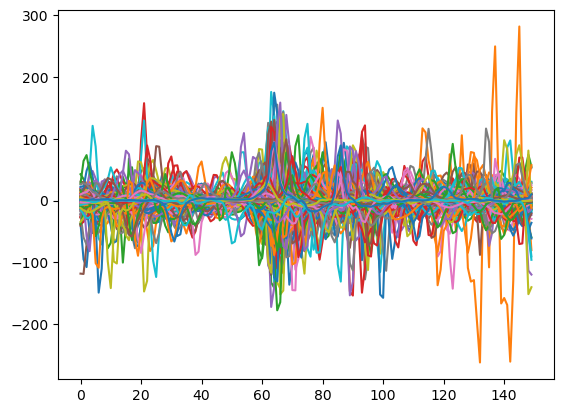

In [38]:
AngV_J74_Gal4 = np.concatenate([AngV4, AngV5, AngV6])
fig = plt.figure()
for d in AngV_J74_Gal4:
    plt.plot(d)

plt.show()

In [39]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz")
df,csvs["opto"]
data7= extract_stimulus_centered_data(df, csvs["opto"])
AngV_J64 = data7['angular_velocity']

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240924_161949.braidz using pyarrow


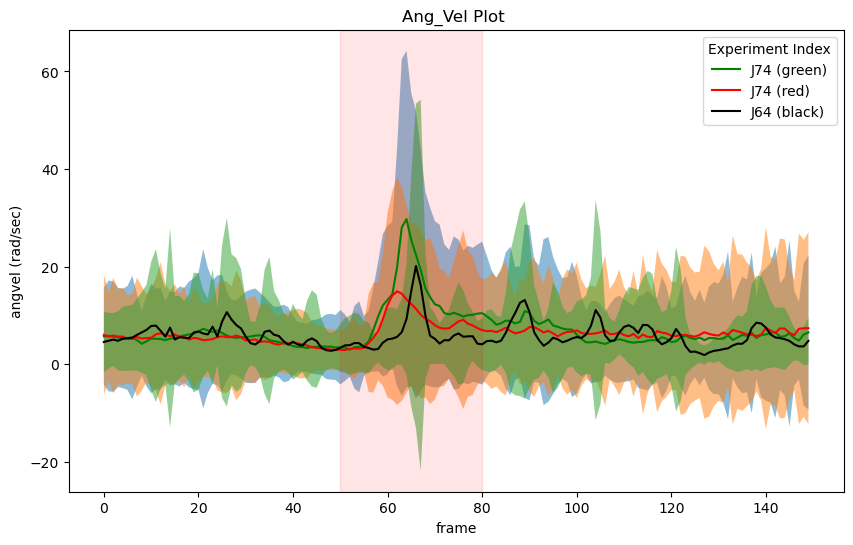

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV_J74_Gal4), ax=ax, label='J74 (green)', color='green')
plot_mean_and_std(np.abs(AngV_J73_Gal4), ax=ax, label='J74 (red)', color='red')
plot_mean_and_std(np.abs(AngV_J64), ax=ax, label='J64 (black)', color='black')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.set_title("Ang_Vel Plot ")

ax.legend(title="Experiment Index")
ax.axvspan(50, 80, color='red', alpha=0.1)

plt.show()

In [41]:
mean_J74 = np.mean(AngV_J74_Gal4)
std_J74 = np.std(AngV_J74_Gal4)

mean_J73 = np.mean(AngV_J73_Gal4)
std_J73 = np.std(AngV_J73_Gal4)

mean_J64 = np.mean(AngV_J64)
std_J64 = np.std(AngV_J64)

print(f"J74: Mean = {mean_J74:.2f}, Std Dev = {std_J74:.2f}")
print(f"J73: Mean = {mean_J73:.2f}, Std Dev = {std_J73:.2f}")
print(f"J64: Mean = {mean_J64:.2f}, Std Dev = {std_J64:.2f}")

J74: Mean = 0.08, Std Dev = 15.00
J73: Mean = -0.07, Std Dev = 14.04
J64: Mean = -1.30, Std Dev = 11.72


In [42]:
corr_J74_J73 = np.corrcoef(AngV_J74_Gal4, AngV_J73_Gal4)[0, 1]
corr_J74_J64 = np.corrcoef(AngV_J74_Gal4, AngV_J64)[0, 1]

print(f"Correlation between J74 and J73: {corr_J74_J73:.2f}")
print(f"Correlation between J74 and J64: {corr_J74_J64:.2f}")


Correlation between J74 and J73: -0.31
Correlation between J74 and J64: -0.31


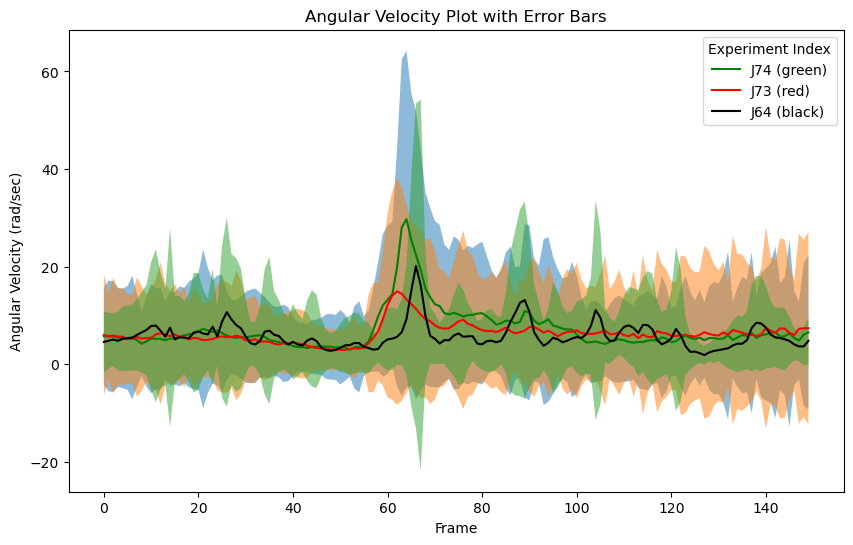

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each dataset with mean and standard deviation
plot_mean_and_std(np.abs(AngV_J74_Gal4), ax=ax, label='J74 (green)', color='green')
plot_mean_and_std(np.abs(AngV_J73_Gal4), ax=ax, label='J73 (red)', color='red')
plot_mean_and_std(np.abs(AngV_J64), ax=ax, label='J64 (black)', color='black')

# Add labels and title
ax.set_xlabel("Frame")
ax.set_ylabel("Angular Velocity (rad/sec)")
ax.set_title("Angular Velocity Plot with Error Bars")

# Show legend
ax.legend(title="Experiment Index")

# Show the plot
plt.show()


In [44]:
import numpy as np
from scipy import stats

# Convert lists to NumPy arrays if they aren't already arrays
AngV_J74_Gal4 = np.array(AngV_J74_Gal4)
AngV_J73_Gal4 = np.array(AngV_J73_Gal4)
AngV_J64 = np.array(AngV_J64)

# Flatten the arrays if needed (if they are multidimensional)
AngV_J74_Gal4 = AngV_J74_Gal4.flatten()
AngV_J73_Gal4 = AngV_J73_Gal4.flatten()
AngV_J64 = AngV_J64.flatten()

# Perform t-test between J74 and J73
t_stat, p_value = stats.ttest_ind(AngV_J74_Gal4, AngV_J73_Gal4)

# Print t-statistic and p-value
print(f"T-test between J74 and J73: t-stat = {t_stat:.2f}, p-value = {p_value:.2e}")


f_stat, p_value = stats.f_oneway(AngV_J74_Gal4, AngV_J73_Gal4, AngV_J64)
print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.2e}")


T-test between J74 and J73: t-stat = 1.61, p-value = 1.08e-01
ANOVA: F-statistic = 13.17, p-value = 1.90e-06


In [45]:
data = np.concatenate([AngV_J74_Gal4, AngV_J73_Gal4, AngV_J64])
groups = ['J74'] * len(AngV_J74_Gal4) + ['J73'] * len(AngV_J73_Gal4) + ['J64'] * len(AngV_J64)

tukey_result = pairwise_tukeyhsd(data, groups, alpha=0.05)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
   J64    J73   1.2389    0.0   0.611 1.8668   True
   J64    J74   1.3793    0.0  0.7446  2.014   True
   J73    J74   0.1404 0.2397 -0.0635 0.3444  False
---------------------------------------------------


In [ ]:


# Prepare the DataFrame
data = pd.DataFrame({
    'Angular_Velocity': np.concatenate([AngV_J64, AngV_J73_Gal4, AngV_J74_Gal4]),
    'Group': ['J64'] * len(AngV_J64) + ['J73'] * len(AngV_J73_Gal4) + ['J74'] * len(AngV_J74_Gal4)
})

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Angular_Velocity', data=data, hue='Group', palette='Set2', legend=False)

# Reduce the marker size for swarmplot
sns.swarmplot(x='Group', y='Angular_Velocity', data=data, color='black', alpha=0.6, size=3)  # Adjust size here

# Add titles and labels
plt.title('Angular Velocity Comparison Across Groups')
plt.ylabel('Angular Velocity (rad/sec)')
plt.xlabel('Groups')

# Show the Tukey HSD results as text on the plot
tukey_result = pairwise_tukeyhsd(data['Angular_Velocity'], data['Group'], alpha=0.05)
plt.figtext(0.15, 0.01, str(tukey_result), fontsize=10, ha='left', va='bottom', bbox=dict(facecolor='white', alpha=0.5))

# Save the figure
plt.tight_layout()
plt.savefig('angular_velocity_comparison.png', dpi=300)
plt.show()


In [ ]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz")
df, csvs["opto"]

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240925_141823.braidz using pyarrow


(         obj_id    frame     timestamp         x         y         z  \
 0             0   186251  1.727267e+09 -0.131585  0.097662 -0.008131   
 1             0   186252  1.727267e+09 -0.131757  0.098755 -0.003995   
 2             0   186253  1.727267e+09 -0.131680  0.099017 -0.002568   
 3             0   186254  1.727267e+09 -0.131592  0.099009 -0.002264   
 4             0   186255  1.727267e+09 -0.131522  0.098911 -0.002405   
 ...         ...      ...           ...       ...       ...       ...   
 9527032   57000  8266826  1.727348e+09 -0.079032 -0.073880  0.161180   
 9527033   57000  8266827  1.727348e+09 -0.078870 -0.073162  0.162114   
 9527034   57000  8266828  1.727348e+09 -0.078678 -0.072331  0.163072   
 9527035   57000  8266829  1.727348e+09 -0.078337 -0.071388  0.164042   
 9527036   57000  8266830  1.727348e+09 -0.078002 -0.070387  0.165081   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.039390  0.061711  0.230551  1.373796e-07

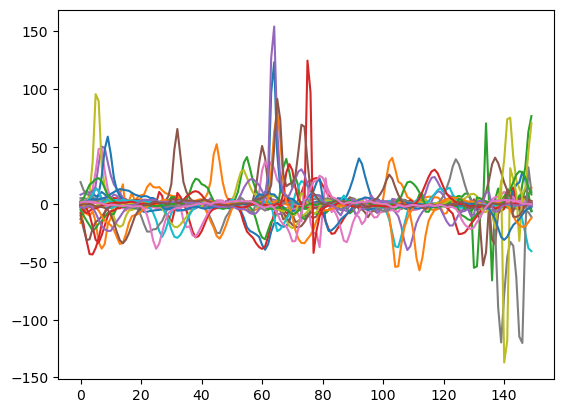

In [ ]:
data7 = extract_stimulus_centered_data(df, csvs["opto"])
list(data7)
AngV_J72 = data7['angular_velocity']
fig = plt.figure()
for d in AngV_J72:
    plt.plot(d)

plt.show()

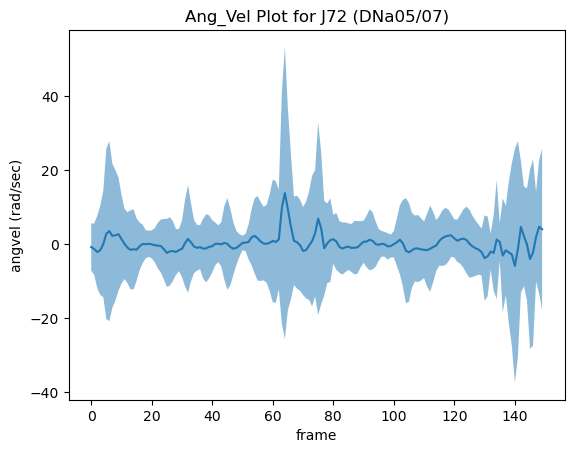

In [ ]:
fig_combined, ax_combined = plt.subplots()
plot_mean_and_std(AngV_J72, ax=ax_combined)
ax_combined.set_xlabel("frame")
ax_combined.set_ylabel("angvel (rad/sec)")
ax_combined.set_title("Ang_Vel Plot for J72 (DNa05/07)")
plt.show()

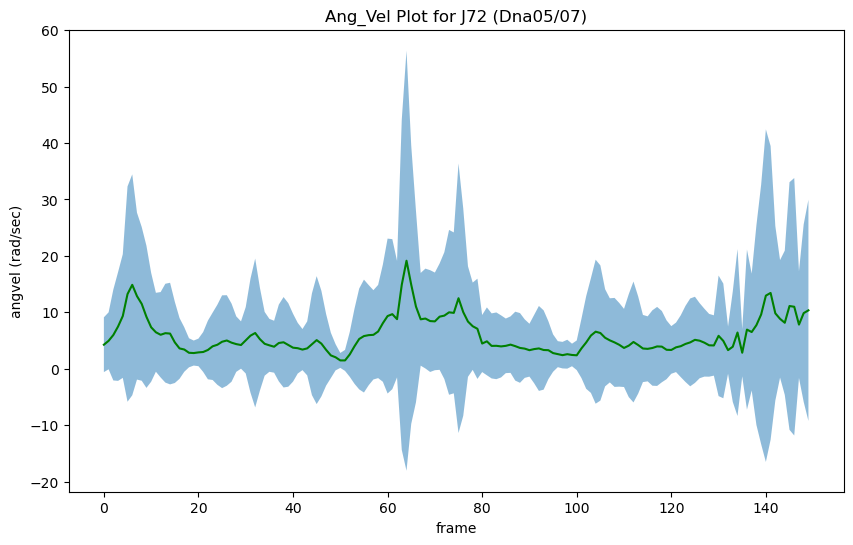

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_mean_and_std(np.abs(AngV_J72), ax=ax, label='Ang_Vel Plot of J72', color='green')
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.set_title("Ang_Vel Plot for J72 (Dna05/07)")

plt.show()